<a href="https://colab.research.google.com/github/Vanshika-Doshi/Pr_project/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# loading dataset to Pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [3]:
# Grab a peek at the data
# first 5 rows of dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Last 5 rows of dataset
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking the missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


This dataset is highly unbalanced

In [8]:
print(valid.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
# statistical measures of the data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


0----Valid Transaction

1----Fraud Transaction

*Correlation* Matrix

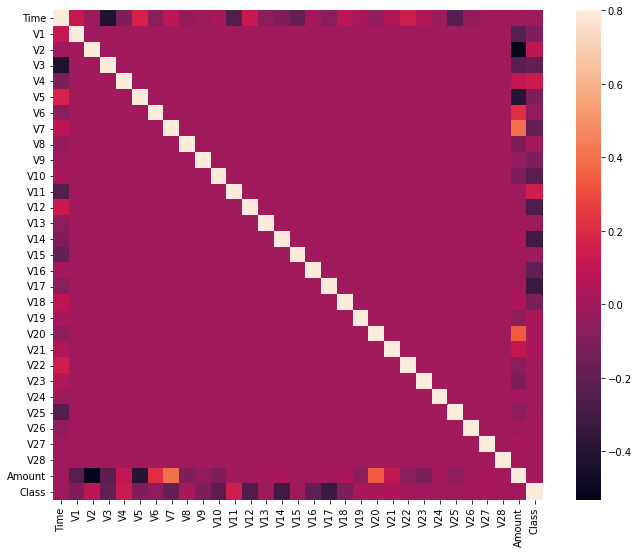

In [12]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

**Under**-Slampling

Build a sample dataset containing similar distribution of normal transactions and fraudlent Transactions

Number of Fraudulent Transaction-->492

In [13]:
valid_sample = valid.sample(n=492)

Concatenating two DataFrames

In [14]:
new_dataset = pd.concat([valid_sample, fraud], axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
227463,145086.0,-1.394688,0.784009,0.589370,0.913857,0.535901,0.961964,0.331981,0.412495,-0.806325,...,0.024119,0.355354,0.078363,0.198796,-0.223730,2.339594,-0.429562,0.011282,56.86,0
265704,162013.0,1.515470,-2.135930,-0.998386,-0.862387,-1.164205,0.297142,-0.874699,0.102398,-0.068152,...,0.615195,0.992172,-0.162831,0.329189,-0.316239,-0.123575,-0.055251,0.003490,338.00,0
214604,139742.0,-4.053929,-4.475398,0.827905,1.546172,1.355533,1.375125,0.729025,0.708259,-0.531913,...,1.017839,0.784128,1.927822,-1.755925,0.861763,-0.207722,-0.229242,0.166465,792.00,0
207089,136514.0,1.892527,-0.244914,-1.761119,0.347080,0.056509,-0.818230,0.011629,-0.071563,0.958889,...,-0.195437,-0.511768,0.099800,-0.480352,-0.111440,-0.090330,-0.028925,-0.027470,65.20,0
252835,155990.0,-0.520313,0.481563,0.776071,-0.413770,-0.883158,-0.289232,0.381705,0.047970,0.792848,...,0.260209,1.021912,-0.012549,0.104259,-0.493343,0.075044,-0.382990,-0.215347,101.50,0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95534.691057,0.051972,-0.035766,0.093571,0.046326,-0.065592,0.006443,-0.065580,0.006495,0.010940,...,-0.030094,0.000387,0.005238,0.019617,0.00500,-0.015334,-0.012101,-0.024589,0.024489,78.734167
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


Spliting the data into Features and Targets

axis=0----->rows

axis=1----->column

In [19]:
X = new_dataset.drop(['Class'], axis = 1)
Y = new_dataset["Class"]

In [20]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
227463  145086.0 -1.394688  0.784009  0.589370  0.913857  0.535901  0.961964   
265704  162013.0  1.515470 -2.135930 -0.998386 -0.862387 -1.164205  0.297142   
214604  139742.0 -4.053929 -4.475398  0.827905  1.546172  1.355533  1.375125   
207089  136514.0  1.892527 -0.244914 -1.761119  0.347080  0.056509 -0.818230   
252835  155990.0 -0.520313  0.481563  0.776071 -0.413770 -0.883158 -0.289232   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(Y)

227463    0
265704    0
214604    0
207089    0
252835    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Spliting data into trainting data and testing data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training Method - 1

Logistic Regression

In [24]:
model = LogisticRegression()

In [25]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [26]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Accuracy on Training data: ', training_data_accuracy)

Accuracy on Training data:  0.9479034307496823


In [28]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy on Testing data: ', test_data_accuracy)

Accuracy on Testing data:  0.9390862944162437


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [31]:
print (classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.98      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



Confusion Matrix

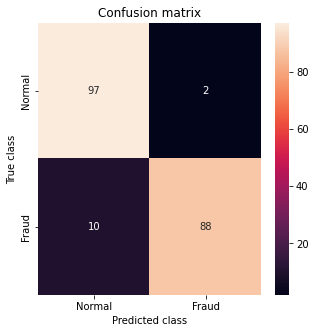

In [32]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize =(5,5))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [33]:
#AUC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

Y_pred_logit_proba = model.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(Y_test,  Y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(Y_test, Y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.9763966192537621


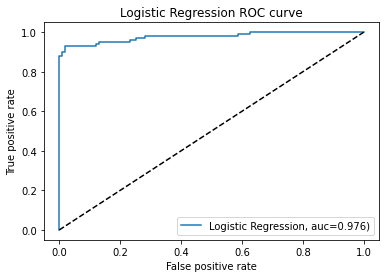

In [34]:
#ROC
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

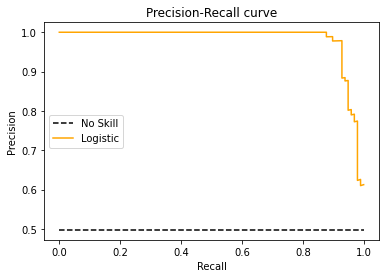

In [35]:
from sklearn.metrics import precision_recall_curve

logit_precision, logit_recall, _ = precision_recall_curve(Y_test, Y_pred_logit_proba)
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

Model Training Method - 2

Random Forest Classifier

In [36]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [37]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)


In [39]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

Model Evaluation

In [40]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.987012987012987
The recall is 0.7755102040816326
The F1-Score is 0.8685714285714285
The Matthews correlation coefficient is0.8747121626683524


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

print (classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Confusion Matrix

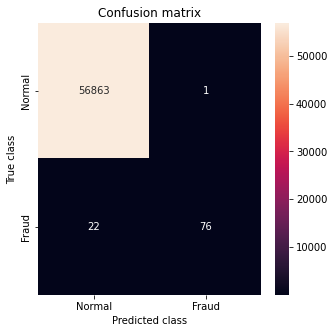

In [42]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [43]:
#AUC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

y_pred_rf_proba = rfc.predict_proba(xTest)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(yTest,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(yTest, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9527132585589103


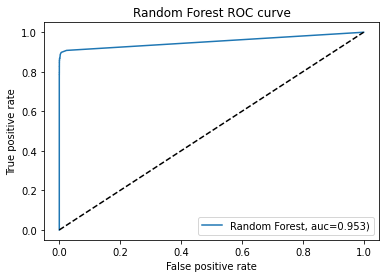

In [44]:
#ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


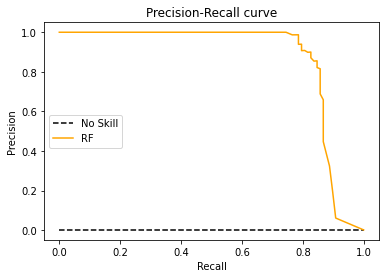

In [46]:
from sklearn.metrics import precision_recall_curve

rf_precision, rf_recall, _ = precision_recall_curve(yTest, y_pred_rf_proba)
no_skill = len(yTest[yTest==1]) / len(yTest)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(rf_recall, rf_precision, color='orange', label='RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

Model Training Method - 3

KNN

In [47]:
X = new_dataset.drop(['Class'], axis = 1)
Y = new_dataset["Class"]

In [48]:
used_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

# drops columns in both standarized and not standarized feature matrixes
X = X[used_columns]


In [49]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_jobs=-1)

# Create standardizer
scaler = preprocessing.StandardScaler()

# Create a pipeline
pipeline = Pipeline([("scaler", scaler), ("knn", knn)])

# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7]}]


# Create grid search
classifier = GridSearchCV(pipeline, search_space, cv=5, verbose=0)

# Fit grid search
model_knn = classifier.fit(X, Y)

In [50]:
# drop unused columns of original dataframe, separate in X and and test model with original dataframe
df_X = new_dataset.drop(columns='Class')
df_X = df_X[used_columns]
df_y = new_dataset['Class']
knn.fit(df_X,df_y)

y_predicted = model_knn.predict(df_X)

Model Evaluation

In [51]:
# Best neighborhood size (k)
K = model_knn.best_estimator_.get_params()["knn__n_neighbors"]
print(f'The best value of K is: {K}')

The best value of K is: 7


In [52]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {round(accuracy_score(df_y,y_predicted)*100,2)} %')

Accuracy: 94.0 %


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

print (classification_report(df_y, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       492
           1       0.99      0.89      0.94       492

    accuracy                           0.94       984
   macro avg       0.94      0.94      0.94       984
weighted avg       0.94      0.94      0.94       984



Confusion Matrix

(Text(33.0, 0.5, 'True Class'), Text(0.5, 15.0, 'Predicted Class'))

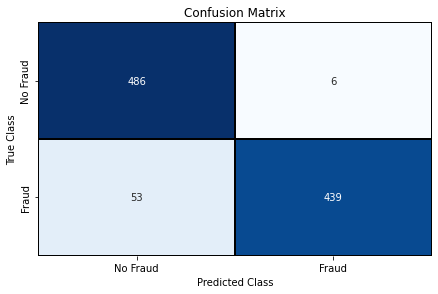

In [54]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(df_y, y_predicted)

# represents confusion matrix with heatmap
dataframe = pd.DataFrame(matrix, index=['No Fraud', 'Fraud'], columns=['No Fraud', 'Fraud'])
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt='g', linewidths=1, linecolor='black')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")

In [55]:
#AUC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

y_pred_knn_proba = knn.predict_proba(df_X)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(df_y,  y_pred_knn_proba)
auc_knn = metrics.roc_auc_score(df_y, y_pred_knn_proba)
print("AUC KNN :", auc_knn)

AUC KNN : 0.8497318890871837


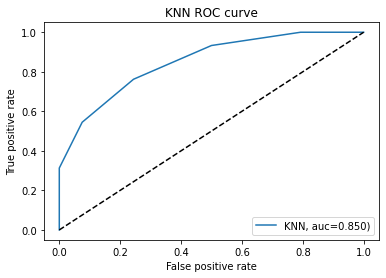

In [56]:
#ROC
plt.plot(fpr_knn,tpr_knn,label="KNN, auc={:.3f})".format(auc_knn))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN ROC curve')
plt.legend(loc=4)
plt.show()

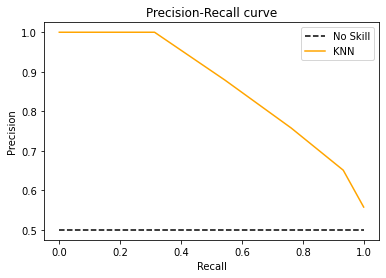

In [57]:
from sklearn.metrics import precision_recall_curve

knn_precision, knn_recall, _ = precision_recall_curve(df_y, y_pred_knn_proba)
no_skill = len(df_y[df_y==1]) / len(df_y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(knn_recall, knn_precision, color='orange', label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

Text(0, 0.5, 'True positive rate')

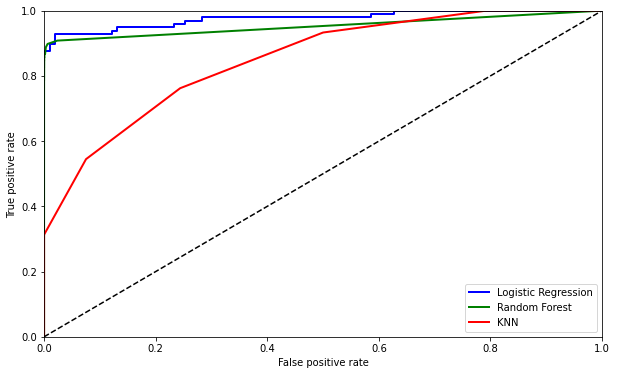

In [58]:
from sklearn.metrics import roc_curve

fpr_logit, tpr_logit, thresholds_logit = roc_curve(Y_test,  Y_pred_logit_proba)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(yTest,  y_pred_rf_proba)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(df_y,  y_pred_knn_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr_logit, tpr_logit, linewidth=2, color='b')
plt.plot(fpr_forest, tpr_forest, linewidth=2, color='g')
plt.plot(fpr_knn, tpr_knn, linewidth=2, color='r')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.legend(['Logistic Regression', 'Random Forest', 'KNN'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')